# Dropout 0.5

In [87]:
import os
import cv2
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd



Lokacija dataset-a

In [88]:
dataset_path = "../data_set"

In [89]:
classes = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]


Inicijalizacija lista za cuvanje podataka


In [90]:
data = []
labels = []

Ucitavanje slika kroz klase


In [91]:
for class_name in classes:
    class_path = os.path.join(dataset_path, "Training", class_name)
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Učitavanje slike u crno-belom formatu
        img = cv2.resize(img, (224, 224))  # Da sve slike budu 224x224px
        data.append(img)
        labels.append(classes.index(class_name))


Konvertovanje listi u numpy


In [92]:
data = np.array(data) / 255.0  # Normalizacija vrednosti piksela
data = np.expand_dims(data, axis=-1)
labels = np.array(labels)

In [93]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)


ImageDataGenerator za data augmentation


In [94]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

CNN model sa Dropout slojem


In [95]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dodajemo Dropout sloj sa dropout rate-om 0.5
model.add(Dense(len(classes), activation='softmax'))

In [96]:
adam_optimizer = Adam(learning_rate=0.005)

model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [97]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=100, validation_data=(X_val, y_val))


Epoch 1/40
72/72 [==============================] - 86s 1s/step - loss: 1.6719 - accuracy: 0.2936 - val_loss: 1.3570 - val_accuracy: 0.2718
Epoch 2/40
72/72 [==============================] - 89s 1s/step - loss: 1.3545 - accuracy: 0.2896 - val_loss: 1.3410 - val_accuracy: 0.2718
Epoch 3/40
72/72 [==============================] - 87s 1s/step - loss: 1.3535 - accuracy: 0.2840 - val_loss: 1.3389 - val_accuracy: 0.2718
Epoch 4/40
72/72 [==============================] - 86s 1s/step - loss: 1.3522 - accuracy: 0.2766 - val_loss: 1.3382 - val_accuracy: 0.2718
Epoch 5/40
72/72 [==============================] - 87s 1s/step - loss: 1.3536 - accuracy: 0.2713 - val_loss: 1.3397 - val_accuracy: 0.2718
Epoch 6/40
72/72 [==============================] - 89s 1s/step - loss: 1.3531 - accuracy: 0.2792 - val_loss: 1.3373 - val_accuracy: 0.3118
Epoch 7/40
72/72 [==============================] - 86s 1s/step - loss: 1.3531 - accuracy: 0.2835 - val_loss: 1.3387 - val_accuracy: 0.2718
Epoch 8/40
72/72 [==

Evaluacija modela na test skupu

In [98]:
test_data = []
test_labels = []

In [99]:
for class_name in classes:
    class_path = os.path.join(dataset_path, "Testing", class_name)
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Učitavanje slike u crno-belom formatu
        img = cv2.resize(img, (224, 224))
        test_data.append(img)
        test_labels.append(classes.index(class_name))


In [100]:
test_data = np.array(test_data) / 255.0
test_data = np.expand_dims(test_data, axis=-1)
test_labels = np.array(test_labels)



Kreiranje tabele sa rezultatima


In [103]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_accuracy = model.evaluate(test_data, test_labels, verbose=0)


In [104]:
results = {
    "Model": ["CNN - Dropout(0.5)"],
    "Train Loss": [train_loss],
    "Train Accuracy": [train_accuracy],
    "Validation Loss": [val_loss],
    "Validation Accuracy": [val_accuracy],
    "Test Loss": [test_loss],
    "Test Accuracy": [test_accuracy]
}

In [105]:
results_df = pd.DataFrame(results)

# Čuvanje tabele rezultata kao CSV fajl
results_df.to_csv("model_results_dropout0_5.csv", index=False)

In [106]:
print(results_df)

                Model  Train Loss  Train Accuracy  Validation Loss  \
0  CNN - Dropout(0.5)    1.350877        0.292247         1.338094   

   Validation Accuracy  Test Loss  Test Accuracy  
0             0.271777   1.442844       0.187817  


Rezultati

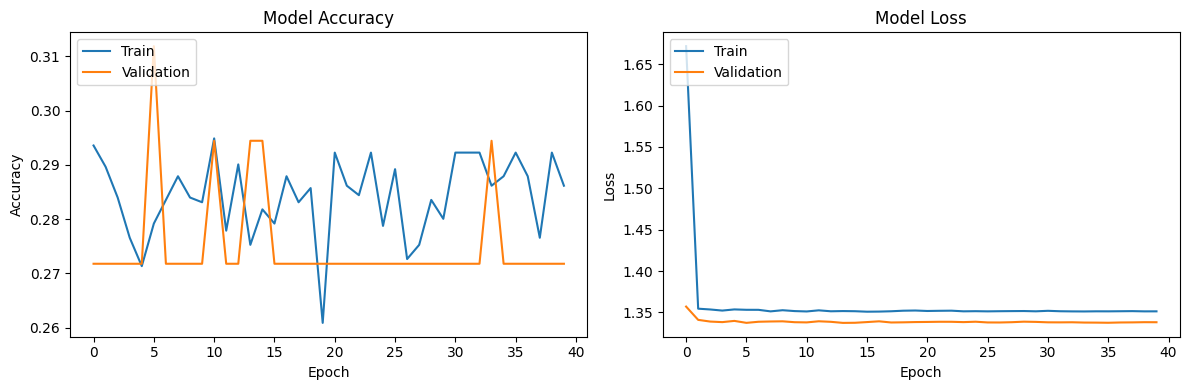

In [109]:
# train history
plt.figure(figsize=(12, 4))

# training, validation accuracy 
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# training, validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Karakeristika modela : rucno postavljen learning rate na 0.005

**Accuracy** 

Visoke oscilacije u tačnosti: Tačnost na treningu i validaciji pokazuje znatne oscilacije kroz sve epohe. Ovo može biti posledica prevelikog learning rate-a, koji uzrokuje da se optimizator pravi prevelike korake i time stalno preskace optimum.

Niska tačnost: Maksimalne vrednosti tačnosti koje ne prelaze 0.3 ukazuju na to da model ima poteškoće sa učenjem iz dostupnih podataka, što bi takođe moglo biti posledica neadekvatnog learning rate-a koji onemogućava stabilno učenje.

**Loss**

Greska na trening setu brzo pada na početku treniranja, što je tipično za situacije sa većim learning rate-om, ali se zatim stabilizuje, što ukazuje na to da model ne uspeva dodatno poboljšati svoje predikcije uprkos daljem treniranju.

Stabilizacija greske: Greska na validacionom skupu pokazuje sličan trend stabilizacije sto nam govori da je ovaj model dostigao stoj maksimum generalizacije

